<a href="https://colab.research.google.com/github/nnguyenu/ML-basic/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-means clustering is an algorithm that allow us to split data into $K$ clusters. Cluster is the set of data point that are closed to each others.

In [ ]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
N = 500
K = 4
means = [[2, 2], [8, 3], [3, 6], [10,8]]
cov = [[1, 0], [0, 1]]

data_point = np.empty([K,N])
X = np.empty([K*N,2],dtype=float)
for i in range(K):
  # create a Gaussian distribution on 2 dimensions with means[i] is the center/average and cov is the standard deviation
  temp = np.random.multivariate_normal(means[i],cov, N)
  for j in range(i*N,(i+1)*N):
    X[j] = temp[j%N]

# this column vector represents the current label of all points
original_label = np.empty(N*K)
for i in range(K*N):
  original_label[i] = i//N
original_label = original_label.transpose()


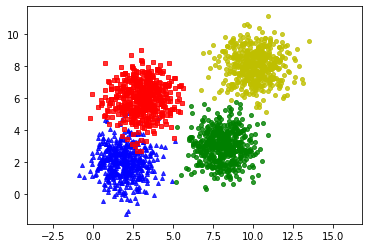

In [45]:
def kmeans_display(X, label):
    K = np.amax(label) + 1

    # X0 will contain all X[i] such that label[i] == 0
    X0 = X[label == 0, :]  
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], 'yo', markersize = 4, alpha = .8)
    plt.axis('equal') # Set equal scaling by changing axis limits
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

We create function "kmeans_init_centers" to randomly pick k rows of X as initial centers.

np.random.choice will generate a randow ndarray from a given 1-D array. Since we choose integer "total_point" as the array, it will use the array np.arange(a). The "replace" parameter determine whether an element can be selected multiple times (in our case we don't want repeat so we set to "False".

In [54]:
def kmeans_init_centers(X, k):
    total_point = X.shape[0]
    choose = np.random.choice(total_point, k, replace=False)
    return X[choose]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    # D is a table where D[i][j] = dist(X[i],centers[j])
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)   # return the index of min value for each row/each X

def kmeans_update_centers(X, labels, K):
    point_dimension = X.shape[1]  # in this case dimension = 2 
    centers = np.zeros((K, point_dimension))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average by finding mean point for each col 
        centers[k] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [ ]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm after 5 iterations:
[[10.0739496   8.03221626]
 [ 3.06542595  6.04631804]
 [ 8.07377995  2.99900299]
 [ 1.95360278  2.01542108]]
[[2, 2], [8, 3], [3, 6], [10, 8]]


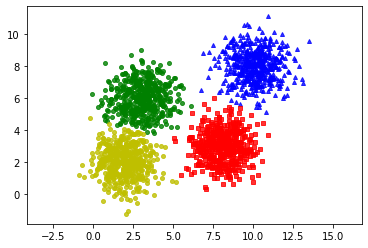

In [61]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm after',it,'iterations:')
print(centers[-1])
print(means)
kmeans_display(X, labels[-1])